Incomplete to do list: <br>
[] Check out QuantEcon page <br>
[] Look at github

In [1]:
import quandl, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

**LINKS** <br>
https://stats.bls.gov <br>
https://www.federalreserve.gov/releases/g17/current/g17.pdf <br>
https://www.federalreserve.gov/ <br>
https://www.quandl.com/data/FRED-Federal-Reserve-Economic-Data/documentation/documentation <br>
https://fred.stlouisfed.org/ <br>

**Leading (LEI (TOTL/YOY) Index)**
- Average weekly hours in manufacturing; initial claims for unemployment insurance; manufacturers’ new orders for consumer goods; manufacturers’ new orders for non-defense capital goods ex-aircraft; institute for supply management new orders index; building permits for new houses; S&P 500 equity price index; Leading credit index; 10  -year treasury to fed funds interest rate spread; and consumer expectations <br>

**Coincident**
- Employees on nonfarm payrolls; real personal income; index of industrial production; manufacturing and trade sales <br>

**Lagging**
- Average duration of unemployment; inventory-sales ratio; change in unit labor costs; average prime lending rate; commercial and industrial loans; ratio of consumer installment debt to income; change in consumer price index 

Organization for economic cooperation and development (OECD) and economic cycle research institute (ECRI) also publish indexes of economic indicators

Source: https://www.conference-board.org/data/bcicountry.cfm?cid=1 and CFA level one econ book

US Business Cycle Expansions and Contractions http://www.nber.org/cycles.html <br> ALSO "FRED/USREC"

In [2]:
cycles = pd.read_excel("T:\\Operations\\Personal\\Alex Schulke\\NBER chronology.xlsx")

*****

from http://www.blackarbs.com/blog/advanced-time-series-plots-in-python/1/6/2017

In [3]:
# import packages
import pandas as pd
import pandas_datareader.data as web

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as ply
import quandl
%matplotlib inline

import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

import missingno as msno
p = print

api_key = '5s7WWtwiPx27vEhTfKx_'
save_loc = 'T:\\Operations\\Personal\\Alex Schulke\\Plot\\'
logo_loc = 'T:\\Operations\\Personal\\Alex Schulke\\Plot\\PrimaryLogoExample.png'

ModuleNotFoundError: No module named 'missingno'

In [4]:
start = pd.to_datetime('1999-01-01')
end = pd.datetime.today()

# check out the dot notation .resample.mean.rename, etc
# MKT = (web.get_data_google([mkt], start, end)['Close']
#       .resample('MS') # month start b/c FED data is month start
#        .mean()
#        .rename(columns={mkt:'SPX'})
#        .assign(SPX_returns=lambda x: np.log(x['SPX']/x['SPX'].shift(1))) # would do the same with vix
#        )
# data = (web.DataReader([f1], 'fred', start, end)
#         .join(MKT, how='outer')
#         .dropna())

data = (quandl.get(['YALE/SPCOMP.1',"FRED/USREC"], start_date=start, end_date=end, collapse='monthly', api_key=api_key)
        .rename(columns={'YALE/SPCOMP - S&P Composite':'SPTR', 'FRED/USREC - Value':'USREC'})
        .assign(SPTR_returns=lambda x: np.log(x['SPTR']/x['SPTR'].shift(1)))
        .dropna())

p(data.head())
p(data.info())
msno.matrix(data)

NameError: name 'api_key' is not defined

In [5]:
# recessions are market as 1 in the data
recs = data.query('USREC==1')

# Select the two recessions over the time period
recs_2k = recs.loc['2001']
recs_2k8 = recs.loc['2008':]

# now we can grab the indices for the start
# and end of each recession
recs2k_bgn = recs_2k.index[0]
recs2k_end = recs_2k.index[-1]

recs2k8_bgn = recs_2k8.index[0]
recs2k8_end = recs_2k8.index[-1]

NameError: name 'data' is not defined

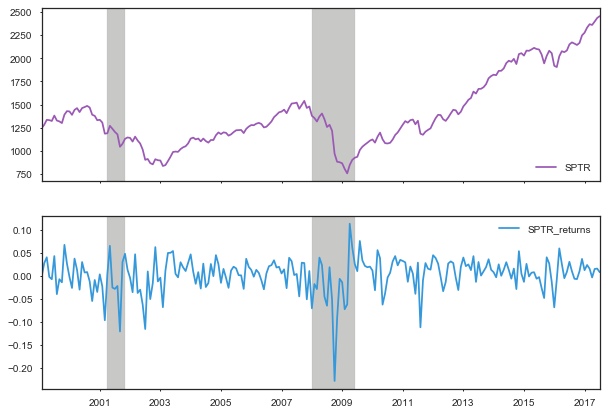

In [7]:
plot_cols = ['SPTR', 'SPTR_returns']

# 2 axes for 2 subplots

plt.plot(a)

fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes)
for ax in axes:
    # axvspan is what is making the shading obvi
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end, color=sns.xkcd_rgb['grey'], alpha=0.5)

Adding chart titles, axis labels, sprucing up the legend, and adding a horizontal line for avg (or zero if return)

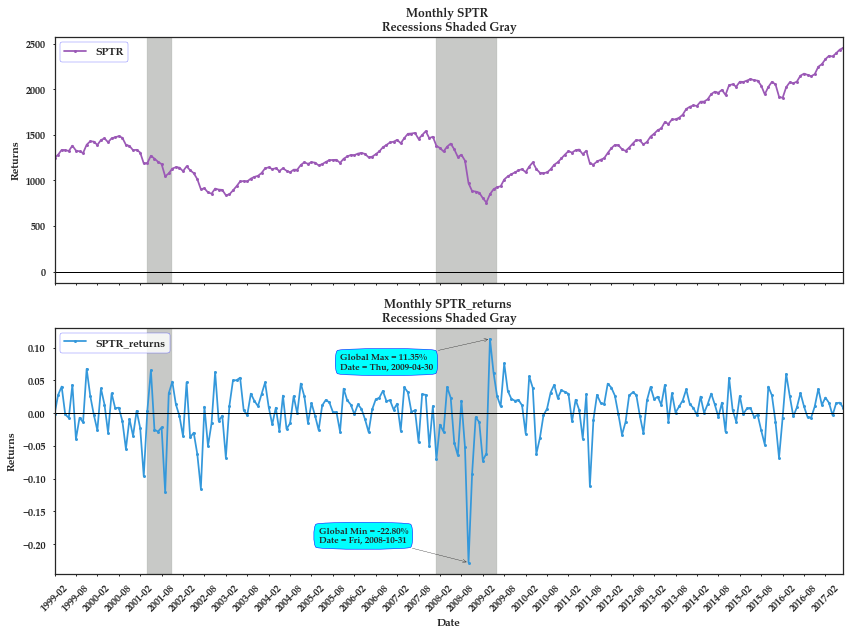

In [8]:
mpl.rcParams['font.family'] = 'Book Antiqua'
fig, axes = plt.subplots(2,1, figsize=(12,9), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes, marker='o', ms=3)

# for subplots we must add feautres by subplot axis 
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Monthly ' + col + ' \nRecessions Shaded Gray')
    
    # add axis labels
    ax.set_ylabel('Returns')
    ax.set_xlabel('Date')
    
    # upgrade axis tick labels
    yticks = ax.get_yticks()
    # ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in yticks]);
    
    dates_rng = pd.date_range(data.index[0], data.index[-1], freq ='6M')
    plt.xticks(dates_rng, [dtz.strftime('%Y-%m') for dtz in dates_rng], rotation=45)
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

"""
Now we will add the max and min of each graph. we need to find max/mins and their dates
"""
# just for the returns, not the level
# MAX SPTR Returns
sptr_max_ = data[plot_cols[1]].max()
sptr_max_idx_ = data[plot_cols[1]].idxmax(axis=0, skipna=True)

# MIN SPTR Returns
sptr_min_ = data[plot_cols[1]].min()
sptr_min_idx_ = data[plot_cols[1]].idxmin(axis=0, skipna=True)

# add global max/min annotations
# add cool annotation box

bbox_props = dict(boxstyle='round4, pad=0.6', fc='cyan', ec='b', lw=0.5)

# would use axis[0] for top subplot

axes[1].annotate('Global Max = {:.2%}\nDate = {}'
                 .format(sptr_max_, sptr_max_idx_.strftime('%a, %Y-%m-%d')),
            fontsize=9,
            fontweight='bold',
            xy=(sptr_max_idx_, sptr_max_),  
            xycoords='data',
            xytext=(-150, -30),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)    

axes[1].annotate('Global Min = {:.2%}\nDate = {}'
                 .format(sptr_min_, sptr_min_idx_.strftime('%a, %Y-%m-%d')),
            fontsize=9,
            fontweight='demi',
            xy=(sptr_min_idx_, sptr_min_),  
            xycoords='data',
            xytext=(-150, 20),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)

# add logo watermark
# im = mpl.image.imread(logo_loc)
# axes[0].figure.figimage(im, origin='upper', alpha=0.125, zorder=10)

# now to use tight layout
plt.tight_layout()

*****

**Recession** - 2 consecutive quarters of negative real gdp growth

**GDP** - MV of all final goods and services produced in a country $$\text{GDP = C + I + G + (X - M)}$$ <br> [whats included in Pvt_inv?](http://bea.gov/national/pdf/nipaguid.pdf)

In [9]:
Personal_consumption = quandl.get("FRED/PCECC96")
Gvt_spending = quandl.get("FRED/GCEC96")
Pvt_inv = quandl.get("FRED/GPDIC1")
Net_exports = (quandl.get("FRED/EXPGSC1") - quandl.get("FRED/IMPGSC1"))
GDP_agg = quandl.get("FRED/PCECC96") + quandl.get("FRED/GCEC96") + quandl.get("FRED/GPDIC1") + (quandl.get("FRED/EXPGSC1") - quandl.get("FRED/IMPGSC1"))

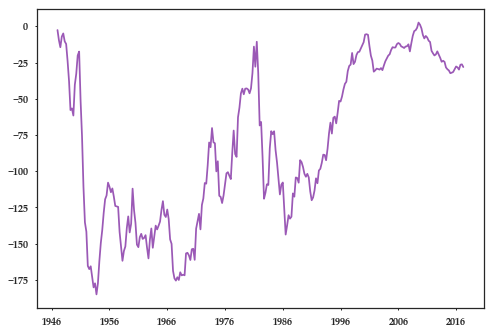

In [10]:
GDP_3 = quandl.get("FRED/GDPC1")
DIF = GDP_3 - GDP_agg
plt.plot(DIF);

In [11]:
# this looks different than GDP CURY INDEX GP BBG YoY %chng
# COuld be bc Nominal VS Real

GDP_agg_pctchng = GDP_agg.pct_change()[1:]
print(GDP_agg_pctchng)

               Value
Date                
1947-04-01  0.002455
1947-07-01  0.001498
1947-10-01  0.011843
1948-01-01  0.013538
1948-04-01  0.018989
1948-07-01  0.006437
1948-10-01  0.006818
1949-01-01 -0.006708
1949-04-01  0.006409
1949-07-01  0.010124
1949-10-01 -0.006334
1950-01-01  0.028391
1950-04-01  0.026092
1950-07-01  0.032173
1950-10-01  0.017906
1951-01-01  0.028453
1951-04-01  0.027353
1951-07-01  0.034331
1951-10-01  0.011917
1952-01-01  0.012572
1952-04-01  0.011149
1952-07-01  0.007639
1952-10-01  0.029975
1953-01-01  0.020260
1953-04-01  0.009873
1953-07-01 -0.006272
1953-10-01 -0.011415
1954-01-01 -0.007193
1954-04-01 -0.004579
1954-07-01  0.006016
...              ...
2010-01-01  0.004502
2010-04-01  0.009970
2010-07-01  0.006916
2010-10-01  0.006180
2011-01-01 -0.003788
2011-04-01  0.007420
2011-07-01  0.002161
2011-10-01  0.011660
2012-01-01  0.006736
2012-04-01  0.004759
2012-07-01  0.001149
2012-10-01  0.000092
2013-01-01  0.007136
2013-04-01  0.002054
2013-07-01  0

In [12]:
# Make this not look like trash

C_last = Personal_consumption['Value'].iloc[-1]
I_last = Pvt_inv['Value'].iloc[-1]
G_last = Gvt_spending['Value'].iloc[-1]
XM_last = Net_exports['Value'].iloc[-1]
total = C_last + I_last + G_last + XM_last
C_pct = C_last / total
I_pct = I_last / total
G_pct = G_last / total
XM_pct = XM_last / total
print(C_pct, I_pct, G_pct, XM_pct)
print(total)

0.694943393395 0.171349882285 0.169672085018 -0.0359653606971
17058.08


In [13]:
GDP = pd.concat([Personal_consumption, Gvt_spending, Pvt_inv, Net_exports], axis=1)

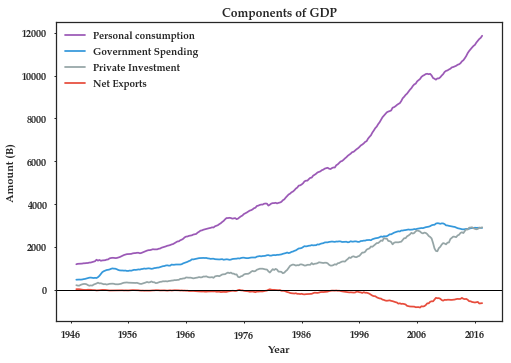

In [14]:
plt.plot(Personal_consumption, label='Personal consumption')
plt.plot(Gvt_spending, label='Government Spending')
plt.plot(Pvt_inv, label='Private Investment')
plt.plot(Net_exports, label='Net Exports')
plt.title('Components of GDP')
plt.xlabel('Year')
plt.ylabel('Amount (B)')
plt.axhline(0, color='k', linestyle='-', linewidth=1)

plt.legend()

plt.show();

In [15]:
GDP_1 = Personal_consumption + Gvt_spending + Pvt_inv + Net_exports - quandl.get("FRED/GDPC1")

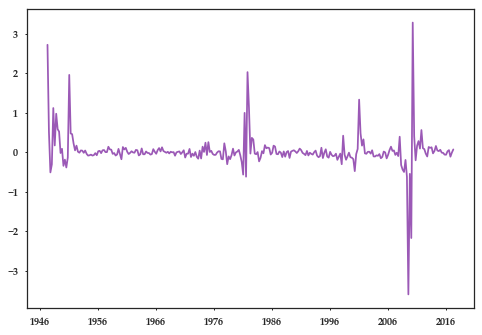

In [16]:
GDP_2 = GDP_1.pct_change()[1:]
plt.plot(GDP_2)

## BMC

World nominal GDP WGDPWRLD 

<font color = 'red' size = 4> Pair with Understanding US Economic Statistics in Personal </f> 

| Function | Desc |
|:----------:|:------:|
|ECST      | World Economic Indicators | 
|ECOW | Economic Data Watch |
|WECO | Economic Calendar |
|ECFC|Economic Forecasting|
|ECSU|Economic Surprise Monitor|


**Essential Economic Indicators** 
- Economic growth, Inflation, Unemployment, Business confidence, Housing

### Inflation
2 primary sources of inflation data. <br>
1. Quarterly GDP report includes the **GDP Price Deflator** based on entire economy
2. Monthly Consumer Price Index **CPI** based on a basket of goods and services
    - What makees up the "representative basket"?  

### Unemployment
- Personal consumption makes up nearly 2/3rds of the US economy, people don't spend money when they are unemployed
- US gdp chng (GDP CYOY INDEX), Nonfarm payrolls (NFP TCH INDEX), US Recessions
    - $\Delta$ Nonfarm Payrolls released first friday of next month
    - Economist rankings and forecasts for nonfarm payrolls {NFP TCH Index ECOS <GO}
    - initial jobless claims series {INJCJC Index GP <go}

### Business Confidence
- MGMT will expand business when they are confident demand will grow. 
- Institute for Supply management (ISM) provides **Purchasing Managers Index** (NAPMPMI INDEX)
- Published monthly with a 1 mo. lag (12/31 level posted first monday in feb)
    - Above 50 = Optimism, Below 50 = Pessimism
    - Good leading indicator of GDP growth, check out NAPMPMI INDEX VS GDP CYOY INDEX
    
    
2 other confidence indicies {CONCJOBN Index and SBOIHIRE Index}

PMI $\text{<go>}$ - PMI data on bloomberg

### Housing
- Best indicator is housing starts (NHSPSTOT INDEX)
    - Construction must be sure consumers are going to buy new house
    - Once buyers do get house, they buy all the stuff that goes with having a new house. 

"Misery index" = inflation + unemployment

**Schedule** <br>
PMI - First monday next month <br>
$\Delta$Nonfarm - First friday next month <br>
Housing Starts - Midway through next month <br> 
CPI - monthly, midway through next month <br>

So we get 3 monthy readings of the above ending in April... then GDP comes out at the end of April. Because of the strong correlation of these timely indicators with GDP growth, actual GDP growth has lost its capacity to surprise. 

GDP estimation by governments is a time-consuming periodic activity, gdp arrives too late to be useful to investors, investors glean gdp growth through related indicators, the indicators that are released first attract the most attention